## Building a regression model to predict real estate prices.
#### Choosing a regularization methods, methods of selecting and creating new variables, determining the quality of the model, optimization methods.


In [2641]:
# Wyczanie pakietów podstawowych
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2642]:
# Wczytanie danych
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}
domy = pd.read_csv("domy.csv", sep=',', dtype=dtype_dict)
domy

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180.0,5650,1,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340.0,5650.0
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570.0,7242,2,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690.0,7639.0
2,5631500400,20150225T000000,180000.0,2.0,1.00,770.0,10000,1,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720.0,8062.0
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960.0,5000,1,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360.0,5000.0
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680.0,8080,1,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800.0,7503.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,0263000018,20140521T000000,360000.0,3.0,2.50,1530.0,1131,3,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530.0,1509.0
21609,6600060120,20150223T000000,400000.0,4.0,2.50,2310.0,5813,2,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830.0,7200.0
21610,1523300141,20140623T000000,402101.0,2.0,0.75,1020.0,1350,2,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020.0,2007.0
21611,0291310100,20150116T000000,400000.0,3.0,2.50,1600.0,2388,2,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410.0,1287.0


## Zadanie 1
Dokonaj analizy posiadanych zmiennych. Zakresy zmienności, korelacje, skośność. Dane nieużyteczne jak np. id można pominąć.

Analiza zmiennych:
- id: numer id
- date: data sprzedaży domu
- price: cena domu
- bedrooms: liczba sypialni
- bathrooms: liczba łazienek
- sqft_living: powierzchnia domu (square feet - stopa kwadratowa)
- sqft_lot: powierzchnia działki (square feet- stopa kwadratowa)
- floors: liczba pięter
- waterfront: czy dom ulokowany w pobliżu zbiornika wodnego (nabrzeża)
- view: jakość widoku z perspektywy nieruchomości
- grade: ocena przyznana nieruchomości
- sqft_above:  powierzchnia domu ponad poziomem gruntu (square feet - stopa kwadratowa)
- sqft_basement: powierzchnia domu pod poziomem gruntu (np. powierzchnia piwnicy)
- yr_built: rok budowy
- yr_renovated: rok, w którym odbyła się ostatnia renowacja
- zipcode: kod pocztowy
- lat: szerokość geograficzna
- long: długość geograficzna
- sqft_living15: powierzchnia 15 sąsiednich domów
- sqft_lot15: powierzchnia 15 sąsiednich działek 

Funkcja kreśląca histogram

In [2643]:
def histogram( cecha, zakres ):
    N = len(cecha)
    plt.figure(figsize=(12, 3*N), dpi=80)
    for i in range(N):
        plt.subplot(N, 1, i+1)
        x = domy[cecha[i]]
        plt.hist(x, bins=20, range=zakres[i], color='Blue')
        plt.title(cecha[i].upper()+' histogram')
        plt.tight_layout()
        plt.xlabel(cecha[i])
        plt.grid()

### Dalsza analiza: typy zmiennych

In [2644]:
domy.dtypes

id                object
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living      float64
sqft_lot           int32
floors            object
waterfront         int32
view               int32
condition          int32
grade              int32
sqft_above         int32
sqft_basement      int32
yr_built           int32
yr_renovated       int32
zipcode           object
lat              float64
long             float64
sqft_living15    float64
sqft_lot15       float64
dtype: object

Zmienne id, date, floors, zipcode są typu Object. Należy je odpowiednio zmodyfikować. 

In [2645]:
#id
domy = domy.set_index('id')

#date
domy['date']= pd.to_datetime(domy['date'])

#floors
domy["floors"] = domy["floors"].astype(str).astype(float)

#zipcode
domy["zipcode"]= domy["zipcode"].astype(str).astype(int)

In [2646]:
domy_clone = domy.copy()
domy.dtypes

date             datetime64[ns]
price                   float64
bedrooms                float64
bathrooms               float64
sqft_living             float64
sqft_lot                  int32
floors                  float64
waterfront                int32
view                      int32
condition                 int32
grade                     int32
sqft_above                int32
sqft_basement             int32
yr_built                  int32
yr_renovated              int32
zipcode                   int32
lat                     float64
long                    float64
sqft_living15           float64
sqft_lot15              float64
dtype: object

In [2647]:
domy

C:\Users\michr\.julia\conda\3\lib\site-packages\IPython\core\displayhook.py:275: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,2014-10-13,221900.0,3.0,1.00,1180.0,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340.0,5650.0
6414100192,2014-12-09,538000.0,3.0,2.25,2570.0,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690.0,7639.0
5631500400,2015-02-25,180000.0,2.0,1.00,770.0,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720.0,8062.0
2487200875,2014-12-09,604000.0,4.0,3.00,1960.0,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360.0,5000.0
1954400510,2015-02-18,510000.0,3.0,2.00,1680.0,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800.0,7503.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0263000018,2014-05-21,360000.0,3.0,2.50,1530.0,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530.0,1509.0
6600060120,2015-02-23,400000.0,4.0,2.50,2310.0,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830.0,7200.0
1523300141,2014-06-23,402101.0,2.0,0.75,1020.0,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020.0,2007.0


Funkcja describe wyświetla szereg statytycznych właściwości zbioru (dla każdej z cech).
- Wartość średnia,
- odchylenie standardowe,
- wartość minimalna
- dolny percentyl
- mediana
- górny percentyl
- wartość maksymalana

In [2648]:
domy.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [2649]:
domy['year'] = domy['date'].dt.year
domy['year'].value_counts()

2014    14633
2015     6980
Name: year, dtype: int64

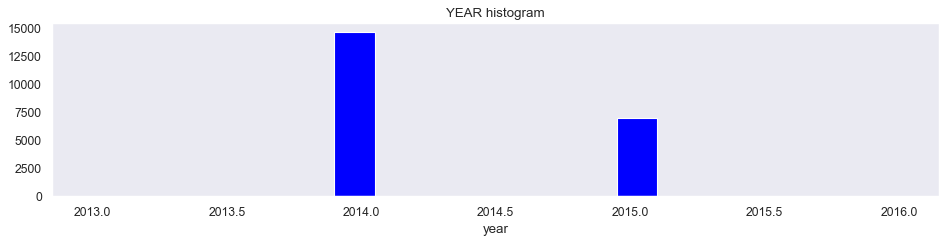

In [2650]:
histogram(['year'], [(2013, 2016 )])

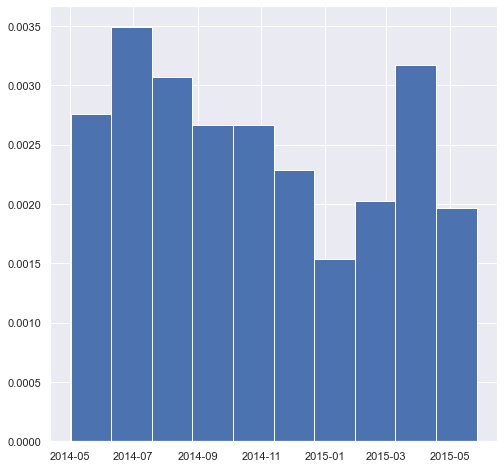

In [2651]:
plt.figure(figsize=(8,8),edgecolor='blue')
plt.hist(domy['date'], density=True)
plt.show()

In [2652]:
domy["bedrooms"].value_counts()

3.0     9824
4.0     6882
2.0     2760
5.0     1601
6.0      272
1.0      199
7.0       38
0.0       13
8.0       13
9.0        6
10.0       3
11.0       1
33.0       1
Name: bedrooms, dtype: int64

##### Usunięcie outliers, który może wpłynąć na późniejszy wynik regresji. Dom o bardzo dużej liczbie łazienek, występujący w zbiorze tylko raz

In [2653]:
domy.drop(domy[domy["bedrooms"] == 33].index, inplace=True)

### Skośność


Skośność to miara, która pozwala określić asymetrię rozkładu wartości zmiennej w okół jej średniej.
Jeżli rozkład zmiennej jest symetryczny względem średniej, to skośność jest równa 0. Gdy rozkład zwieksza się po prawej stronie od średniej, wówczas skośność jest dodatnia, analogicznie, gdy asymetria rozkładu wartości zmiennej zwiększa sie po lewej stronie od jej średniej - skośność jest ujemna

#### Do analizy skośności wykorzystam metodę "scew" z pakietu pandas

In [2654]:
domy_skew = domy.skew()[1:].sort_values(ascending = False)
domy_skew

<ipython-input-2654-0f7b9d5ea814>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  domy_skew = domy.skew()[1:].sort_values(ascending = False)


sqft_lot         13.059731
waterfront       11.384839
sqft_lot15        9.506541
yr_renovated      4.549373
view              3.395652
sqft_basement     1.578053
sqft_living       1.471483
sqft_above        1.446622
sqft_living15     1.108134
condition         1.032873
long              0.884986
grade             0.771033
year              0.757226
floors            0.616107
bedrooms          0.518469
bathrooms         0.511043
zipcode           0.405718
yr_built         -0.469905
lat              -0.485196
dtype: float64

#### Znaczącą prawoskośność wykazało kilka zmiennych:
- sqft_lot: powierzchnia działki
- waterfront: czy dom ulokowany w pobliżu zbiornika wodnego (nabrzeża)
- sqft_lot15: powierzchnia 15 sąsiednich działek

##### Analiza skośności może zostać również zrealizowana za pomocą histogramów

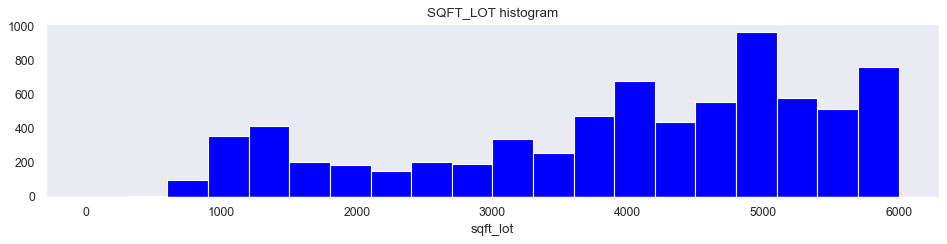

In [2655]:
histogram(['sqft_lot'], [(0, 6e3 )])

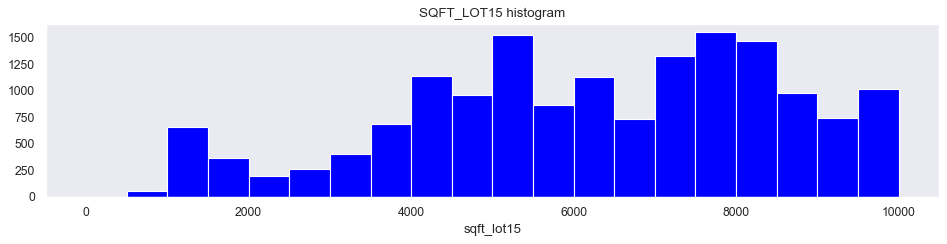

In [2656]:
histogram(['sqft_lot15'], [(0, 1e4)])

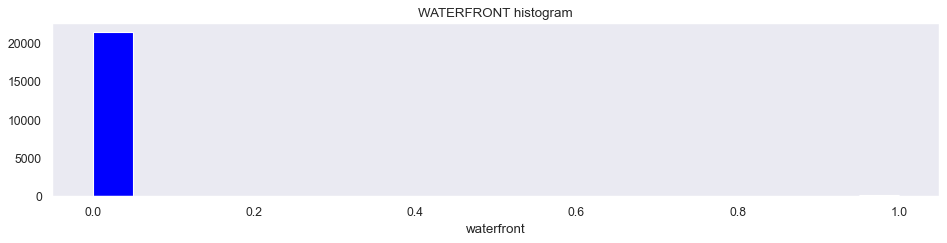

In [2657]:
histogram(['waterfront'], [(0,1)])

Bar plot dla cechy: waterfront (większa czytelność)

0    21449
1      163
Name: waterfront, dtype: int64

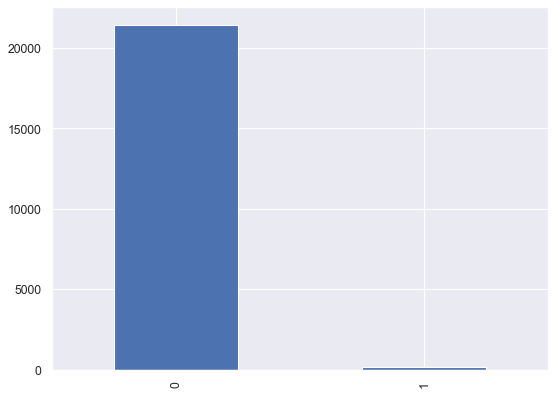

In [2658]:
plt.figure(figsize=(8, 6), dpi=80)
domy['waterfront'].value_counts().plot(kind='bar')
domy_count = domy['waterfront'].value_counts()
domy_count

#### Korelacja
Korelacja to technika statystyczna, która pokazuje czy i w jak mocny sposób powiązane są między sobą zmienne. Korelacja dodatnia polega na takiej zależności zmiennych, że wzrost jednej zmiennej równożnaczny jest ze wzrostem drugiej. Korelacja ujemna występuje wówczas, gdy wzrost jednej zmiennej powoduje spadek wartości drugiej.
Na przykład, gdyby w zbiorze występowała by zmienna wyrażająca poziom przestępczości - najprawdopodobniej jej wzrost oznaczałby spadek ceny domu.

In [2659]:
domy.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year
price,1.000000,0.315445,0.525147,0.702047,0.089664,0.256811,0.266371,0.397299,0.036336,0.667447,0.605591,0.323812,0.054023,0.126437,-0.053209,0.306998,0.021637,0.585404,0.082451,0.003585
bedrooms,0.315445,1.000000,0.529159,0.591467,0.032807,0.181085,-0.006611,0.081930,0.025478,0.366502,0.490600,0.309490,0.159167,0.019617,-0.157093,-0.010541,0.133882,0.402626,0.030402,-0.009035
bathrooms,0.525147,0.529159,1.000000,0.754663,0.087735,0.500645,0.063742,0.187732,-0.124946,0.664979,0.685339,0.283789,0.506012,0.050735,-0.203858,0.024594,0.223028,0.568628,0.087170,-0.026612
sqft_living,0.702047,0.591467,0.754663,1.000000,0.172822,0.353937,0.103816,0.284606,-0.058704,0.762701,0.876597,0.435065,0.318037,0.055358,-0.199421,0.052552,0.240209,0.756419,0.183280,-0.029055
sqft_lot,0.089664,0.032807,0.087735,0.172822,1.000000,-0.005210,0.021603,0.074707,-0.008935,0.113616,0.183507,0.015293,0.053073,0.007641,-0.129571,-0.085675,0.229516,0.144602,0.718556,0.005461
floors,0.256811,0.181085,0.500645,0.353937,-0.005210,1.000000,0.023695,0.029432,-0.263706,0.458171,0.523866,-0.245684,0.489302,0.006330,-0.059102,0.049655,0.125388,0.279856,-0.011282,-0.022345
waterfront,0.266371,-0.006611,0.063742,0.103816,0.021603,0.023695,1.000000,0.401857,0.016665,0.082773,0.072072,0.080591,-0.026165,0.092884,0.030287,-0.014270,-0.041914,0.086461,0.030702,-0.004168
view,0.397299,0.081930,0.187732,0.284606,0.074707,0.029432,0.401857,1.000000,0.046031,0.251315,0.167640,0.276959,-0.053452,0.103915,0.084834,0.006170,-0.078413,0.280432,0.072571,0.001354
condition,0.036336,0.025478,-0.124946,-0.058704,-0.008935,-0.263706,0.016665,0.046031,1.000000,-0.144632,-0.158136,0.174057,-0.361380,-0.060602,0.002973,-0.015048,-0.106423,-0.092731,-0.003373,-0.045518
grade,0.667447,0.366502,0.664979,0.762701,0.113616,0.458171,0.082773,0.251315,-0.144632,1.000000,0.755919,0.168412,0.446952,0.014409,-0.184852,0.114111,0.198355,0.713198,0.119241,-0.030405


Zjawisko lepiej zilustruje heatmapa.

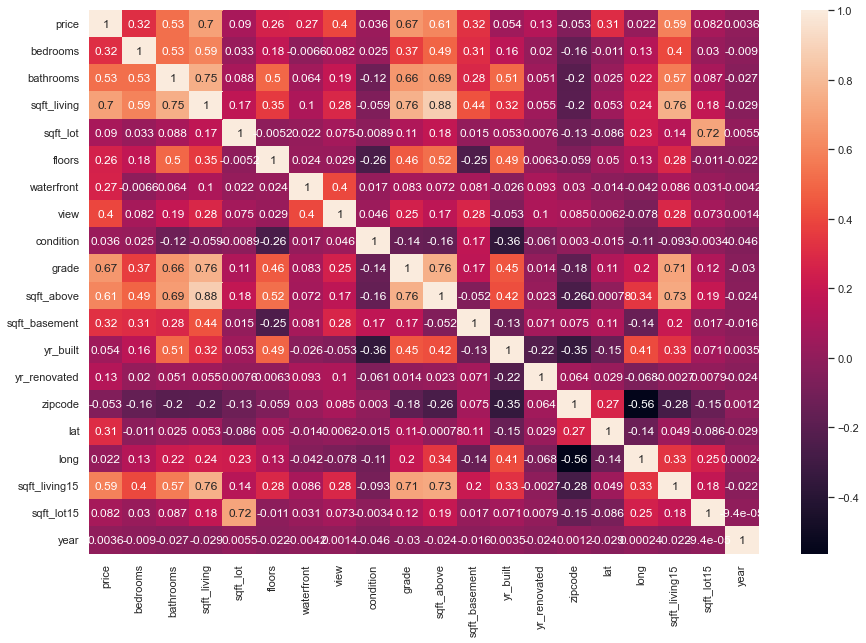

In [2660]:
sn.set({'figure.figsize':(15, 10)})
sn.heatmap(domy.corr(), annot=True)
plt.show()

In [2661]:
domy.corr()['price'].sort_values(ascending = False)

price            1.000000
sqft_living      0.702047
grade            0.667447
sqft_above       0.605591
sqft_living15    0.585404
bathrooms        0.525147
view             0.397299
sqft_basement    0.323812
bedrooms         0.315445
lat              0.306998
waterfront       0.266371
floors           0.256811
yr_renovated     0.126437
sqft_lot         0.089664
sqft_lot15       0.082451
yr_built         0.054023
condition        0.036336
long             0.021637
year             0.003585
zipcode         -0.053209
Name: price, dtype: float64

####  Jak widać zmienne, które silnie korelują z ceną domu to:
- sqft_living: powierzchnia mieszkalna domu
- grade: ocena domu odnosząca się do jakości konstrukcji i mieszkania (niespotykana raczej na polskim rynku)
- sqft_above: powierzchnia mieszkalna powyżej parteru
- sqft_living15: powierzchnia mieszkalna 15 sąsiednich domów


## Zadanie 2
Zaproponuj 5 nowych cech będących wynikiem przeprowadzonych w ramach Zadaniu 1 analiz lub doświadczeń.

##### 1) Remont: aktualnie istnieje zmienna określająca rok remontu, można utworzyć zmienną typu boolean, która będzie określała czy dom był w ogóle remontowany
##### 2) Wiek domu : uzyskany zostanie przez odjęcie daty sprzedaży (roku) i roku budowy
##### 3)Iloczyn łazienek i sypialni : otrzymana zostanie przez przemnożenie istniejących aktualnie zmiennych: liczba łazienek i liczba sypialnia
##### 4) Powierzchnia działki (sqft_lot) - pozbawiona skośności
##### 5) Powierzchnia 15 sąsiednich działek (sqft_lot15) - pozbawiona skośności

In [2662]:
#1)
domy['renovation'] = domy['yr_renovated'].apply(lambda x: 0 if x == 0 else 1)

#2)
domy['age'] = (domy['date'].dt.year - domy['yr_built'])

#3)
domy['bed_bath_rooms'] = domy['bedrooms'] * domy['bathrooms']

#4)
domy['log_sqft_lot'] = domy['sqft_lot'].transform(np.log)

#5)
domy['log_sqft_lot15'] = domy['sqft_lot15'].transform(np.log)


Sprawdzenie zmiennych 4) i 5) względem starych wartości

In [2663]:
#4) sqft_log & log_sqft_log
print(round(domy["sqft_lot"].skew(), 2))
print(round(domy["log_sqft_lot"].skew(), 2))

13.06
0.96


In [2664]:
#5) sqft_log15 & log_sqft_log16
print(round(domy["sqft_lot15"].skew(), 2))
print(round(domy["log_sqft_lot15"].skew(), 2))

9.51
0.97


## Zadanie 3
Dokonaj wizualiazji nowych cech i określ ich korelację.

In [2665]:
new_features=domy[['price', 'renovation', 'bed_bath_rooms', 'age', 'log_sqft_lot', 'log_sqft_lot15']]
new_features.head()

,price,renovation,bed_bath_rooms,age,log_sqft_lot,log_sqft_lot15
id,,,,,,
7129300520,221900.0,0,3.00,59,8.639411,8.639411
6414100192,538000.0,1,6.75,63,8.887653,8.941022
5631500400,180000.0,0,2.00,82,9.210340,8.994917
2487200875,604000.0,0,12.00,49,8.517193,8.517193
1954400510,510000.0,0,6.00,28,8.997147,8.923058


#### Przedstawienie zależności między zmiennymi za pomocą heatmapy

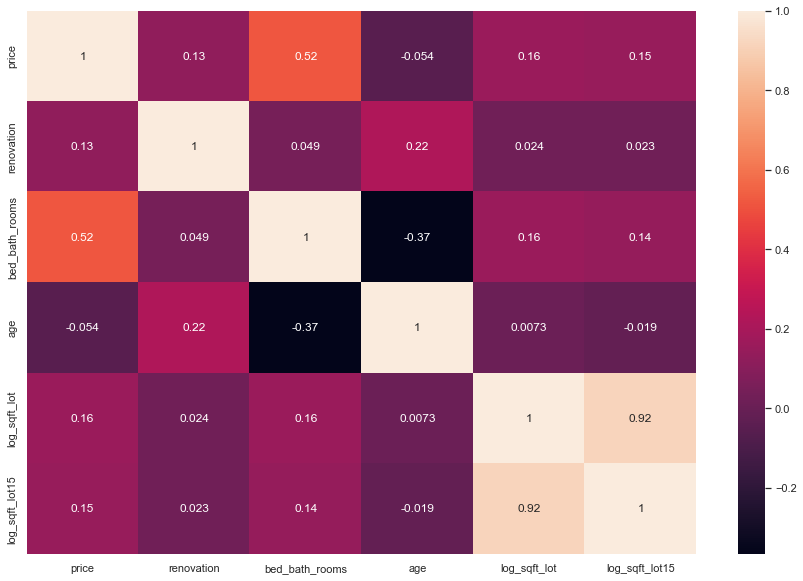

In [2666]:
sn.heatmap(new_features.corr(), annot=True)
plt.show()

Najsilniejszą korelację (dodatnią) względem ceny ma zmienna bed_bath_rooms, która jest iloczynem liczby sypialni oraz łazienek.
Zmienne wyrażające powierzchnię działki, powierzchnie 15 sąsiednich działek oraz zmienna renovation mają również korelację dodatnią względem ceny, lecz nie jest to silna zależność. Ujemną korelację posiada zmienna age, jednak również nie jes to silna zależność.

## Zadanie 4

Wyznacz liniową zależność między 3 najbardziej skorelowanymi ze zmienną opisywaną zmiennymi opisującymi (wszystkie podane cechy + 5 nowo utworzonych). Do wyznaczenia liniowej zależności między cechami, a zmienną opisywaną wykorzystaj pseudoinwersję.

In [2667]:
features = domy.columns
features

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year', 'renovation', 'age',
       'bed_bath_rooms', 'log_sqft_lot', 'log_sqft_lot15'],
      dtype='object')

##### Cechy najbardziej skorelowane ze zmienną opisywaną (price). Wybór trzech.

In [2668]:
domy.corr()['price'].sort_values(ascending = False)

price             1.000000
sqft_living       0.702047
grade             0.667447
sqft_above        0.605591
sqft_living15     0.585404
bathrooms         0.525147
bed_bath_rooms    0.518189
view              0.397299
sqft_basement     0.323812
bedrooms          0.315445
lat               0.306998
waterfront        0.266371
floors            0.256811
log_sqft_lot      0.161323
log_sqft_lot15    0.147588
yr_renovated      0.126437
renovation        0.126095
sqft_lot          0.089664
sqft_lot15        0.082451
yr_built          0.054023
condition         0.036336
long              0.021637
year              0.003585
zipcode          -0.053209
age              -0.053962
Name: price, dtype: float64

In [2669]:
features_top = domy.corr()['price'].sort_values(ascending = False)[1:4].index
#print(features_top)

In [2670]:
features_top.to_list()

['sqft_living', 'grade', 'sqft_above']

### Podział danych (zależnie od indeksu)

In [2671]:
domy.dtypes

date              datetime64[ns]
price                    float64
bedrooms                 float64
bathrooms                float64
sqft_living              float64
sqft_lot                   int32
floors                   float64
waterfront                 int32
view                       int32
condition                  int32
grade                      int32
sqft_above                 int32
sqft_basement              int32
yr_built                   int32
yr_renovated               int32
zipcode                    int32
lat                      float64
long                     float64
sqft_living15            float64
sqft_lot15               float64
year                       int64
renovation                 int64
age                        int64
bed_bath_rooms           float64
log_sqft_lot             float64
log_sqft_lot15           float64
dtype: object

Dodatkowo usunięte zostaną dwie cechy zipcode oraz date.
Cecha date nie jest typu całkowitego, ani zmiennoprzecinkowego, utworzony został jest substytut - zmienna age.

In [2672]:
numer_indeksu = 260684
ceny = domy['price']

domy.drop('price', axis=1, inplace=True)
domy.drop('zipcode', axis=1, inplace=True)
domy.drop('date', axis=1, inplace=True)

domy_train, domy_test, ceny_train, ceny_test = train_test_split(domy, ceny, test_size=0.33, random_state=numer_indeksu)
cechy = domy.columns.values
cechy 

array(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year', 'renovation', 'age',
       'bed_bath_rooms', 'log_sqft_lot', 'log_sqft_lot15'], dtype=object)

#### Wykorzystanie pseudoinwersji

In [2673]:
def model_train(X_train, Y_train):
    X_ones = np.ones(X_train.shape[0])
    X_train = np.concatenate((np.matrix(X_ones).T, np.matrix(X_train).T), axis = 1)

    pinw = np.linalg.pinv(X_train)
    model = np.dot(pinw,Y_train)
    return model

def predict(X_test, model):
    b = np.asarray(model).reshape(-1)[0]
    a = np.asarray(model).reshape(-1)[1]
    
    y_pred = np.dot(X_test, a) + b
    return y_pred

def error(X_test, Y_test, Y_pred):
    return np.sqrt(np.mean((Y_pred - Y_test)**2))

In [2674]:
def prediction(top_features):
    for feature in top_features:

        model = model_train(domy_train[feature], ceny_train)
        a = np.asarray(model).reshape(-1)[1]
        b = np.asarray(model).reshape(-1)[0]

        Y_pred = predict(domy_test[feature], model)
        
        fig, ax = plt.subplots()
        plt.title("CORRELATION BETWEEN " + feature.upper() + " PRICE")
        plt.xlabel(feature)
        plt.ylabel("PRICE")

        ax.scatter(domy_train[feature], ceny_train, color = 'blue')

        x_min, x_max = ax.get_xlim()
        y_min, y_max = a * x_min + b, a * x_max + b

        ax.set_xlim([x_min, x_max])
        _ = ax.plot([x_min, x_max], [y_min, y_max])
        
        plt.show()
        print("a: %s" % (a))
        print("b: %s" % (b))
        print("RMSE: ", round(error(domy_test[feature], ceny_test, Y_pred), 2))

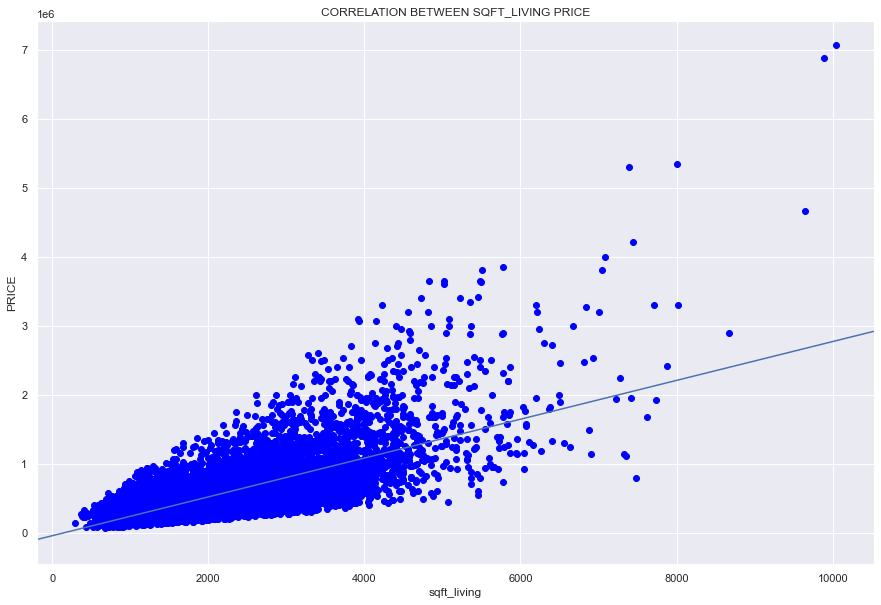

a: 281.3579633679715
b: -43480.65427469411
RMSE:  256981.58


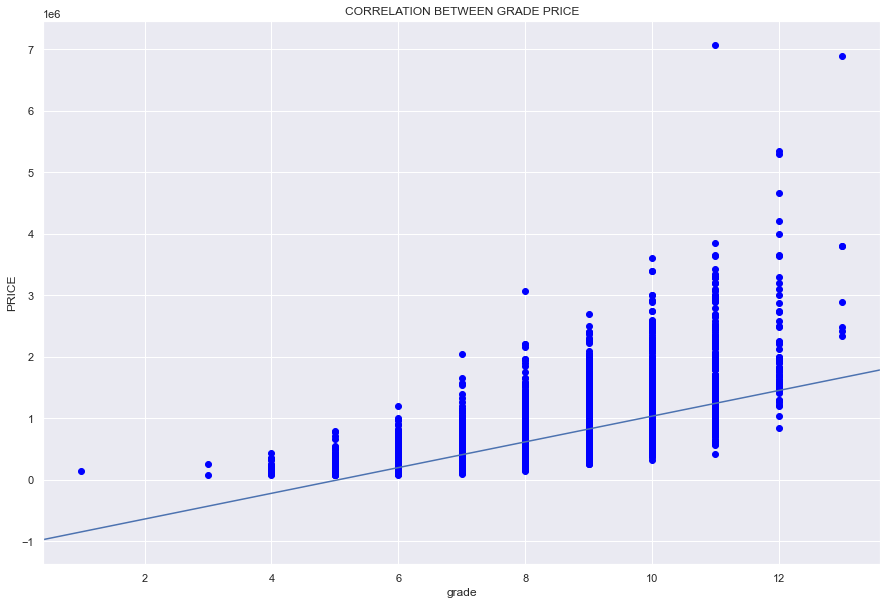

a: 209062.89082426386
b: -1058903.8877156652
RMSE:  269303.25


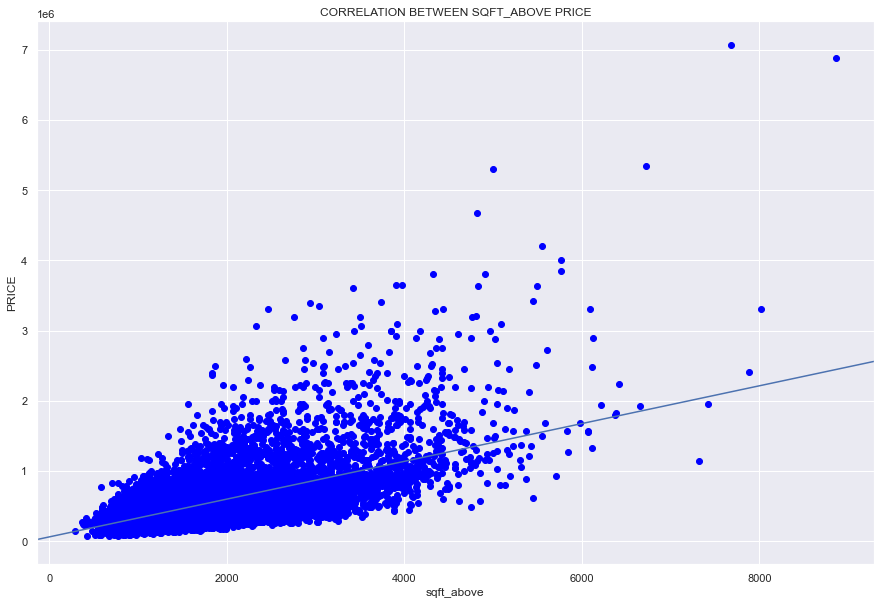

a: 269.1271625761882
b: 60074.289775958336
RMSE:  286709.32


In [2675]:
prediction(features_top)

## Zadanie 5
Napisz metodę regresji krokowej w tył i za jej pomocą wybierz 5 najbardziej wartościowych cech.

Metoda regresji krokowej w tył to metoda doboru zmiennych.
Rozpoczynamy mając pełen zbiór cech (Full model).
Usuwamy po kolei po jednej aktualnie najmniej znaczącej zmiennej.
Wykonujemy to do momentu aż osiągniemy ustalony warunek stopu (liczbę zmiennych) w naszym przypadku to 5 cech.

In [2676]:
X = domy_train.copy()
Y = ceny_train.copy()
row, col = X.shape
row, col

(14480, 23)

In [2677]:
weight = np.random.rand(col) / 100
cechy_regr = list(cechy)
features

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year', 'renovation', 'age',
       'bed_bath_rooms', 'log_sqft_lot', 'log_sqft_lot15'],
      dtype='object')

In [2678]:
while len(weight) > 5:
    w = len(weight);
    cost = np.zeros(w)
    for i in range(w):
        X_delete = X.loc[:, X.columns != X.columns[i]]
        deleted = np.delete(weight, i)
        
        predic = np.array(X_delete.dot(deleted))
        diff = (Y - predic)

        cost[i] = -np.sum(diff**2) / row
    
    lowest = np.argmax(cost)
    
    cechy_regr.pop(lowest)
    weight = np.delete(weight, lowest)
    X = X.loc[:, X.columns != X.columns[lowest]]

##### Zredukowana liczba cech, które zostaną wykorzystane przy trenowaniu modelu:

In [2679]:
cechy_regr

['sqft_lot', 'sqft_above', 'yr_built', 'sqft_living15', 'sqft_lot15']

## Zadanie 6
Dokonaj normalizacji cech (wszystkie podane + 5 zaproponowanych w Zadaniu 1) i przy pomocy metody Lasso lub LARS (metody mają zostać samodzielnie zaimplementowane) wybierz 5 najbardziej wartościowych cech.

**!!! Przy przekształceniach unikaj korzystania z informacji zawartej w zbiorze walidacyjnym i testowym !!!**

In [2680]:
norm = lambda data: (data - data.min()) / (data.max() - data.min())

def input_data(X, y):
    row = norm(X).shape[0]
    col = norm(X).shape[1]
    featr = list(norm(X).columns.values)
    X_arr = np.array(norm(X))
    y_arr = np.array(norm(y))
    
    return X_arr, y_arr, row, col, featr

In [2681]:
domy_train_arr, ceny_train_arr, row, col, featr = input_data(domy_train, ceny_train)

In [2682]:
epochs = 15
L = len(X)

In [2683]:
def lasso(lambd, n_features, learn_rate, model = False, show = False, features=False):
    cost = []
    bias = 0.0
    grade = np.random.rand(domy_train_arr.shape[1])
    for epoch in range(epochs):        
        
        yhat = np.array(domy_train_arr.dot(grade) + bias)
        
        diff = ceny_train_arr - yhat
        
        train_cost = np.sum(diff**2) / (2*row)
        reg_cost = np.sum(np.abs(grade)) * lambd / (2*L)
        cost += [train_cost + reg_cost]

        new_grade = np.zeros(col)

        for c in range(col):
            dW = (-1 * np.dot(diff, domy_train_arr[:, c]) / (2*row))
            
            if (grade[c] > 0):
                dW = (dW + lambd) 
            else:
                (dW - lambd)
                
            new_grade[c] = grade[c] - learn_rate * dW
            
        grade = new_grade
        db = np.sum(diff) / (-2*L)
        bias = bias - learn_rate * db

    if features:
        scores = norm(np.abs(grade))
        pairs = zip(featr, scores)
        pairs = reversed(sorted(pairs, key=lambda p: p[1]))
        pairs = list(pairs)

        result = []
        important = []
        for i in range(n_features):
            feature, importance = pairs[i]
            result.append(feature)
            important.append(importance)

        return result
    
    if show:
        plt.subplots(figsize=(14, 3), dpi=80)
        ticks = range(1, len(costs)+1)
        plt.plot( ticks, costs, marker='o' )
        plt.xticks(ticks=ticks)
        plt.title(f'Learning rate={learn_rate}, λ={lambd}' )
        plt.grid(alpha=0.4)
        plt.xlabel('Epoka')
        plt.ylabel('MSE')
        
    if model:
        d = {f:w for f, w in zip(featr, grade)}
        d['bias'] = bias
        
        return d

In [2684]:
result_lasso = lasso(lambd = 5, n_features = 5, learn_rate=0.1, features = True )
result_lasso

['sqft_basement', 'log_sqft_lot', 'log_sqft_lot15', 'age', 'floors']

## Zadanie 7
Zaimplementuj metodę spadku gradientów dla regularyzacji grzebietowej. Zabezpiecz się przed zbyt dużym współczynnikiem uczenia, badając zbieżność w każdym kroku i w razie potrzeby zmniejszając współczynnik uczenia $\sqrt{2}$ razy.

In [2685]:
epochs = 15
L = len(X)

In [2686]:
def ridgeRegression(lambd, n_features, learn_rate, model = False, show = False, features=False):
    cost = []
    bias = 0.0
    grade = np.random.rand(domy_train_arr.shape[1])
    for e in range(epochs):        

        y_hat = np.array(domy_train_arr.dot(grade) + bias)

        diff = ceny_train_arr - y_hat

        train_cost = np.sum(diff**2) / (2*row)
        reg_cost = np.sum(np.abs(grade)) * lambd / (2*row)
        cost += [train_cost + reg_cost]

        new_grade = np.zeros(col)
        
        for j in range(col):
            dW = (-1 * np.dot(diff, domy_train_arr[:, j]) / (2*row))
            
            if (grade[j] > 0):
                dW = (dW + lambd) 
            else:
                (dW - lambd)
                
            new_grade[j] = grade[j] - learn_rate * dW
            
        grade = new_grade
        db = (-1 * np.sum(diff) / row)
        bias = bias - learn_rate * db

    if features:
        scores = norm(np.abs(grade))
        pairs = zip(featr, scores)
        pairs = reversed(sorted(pairs, key=lambda p: p[1]))
        pairs = list(pairs)

        result = []
        important = []
        for i in range(n_features):
            feature, importance = pairs[i]
            result.append(feature)
            important.append(importance)

        return result
    
    if show:
        plt.subplots(figsize=(14, 3), dpi=80)
        ticks = range(1, len(cost)+1)
        plt.plot( ticks, cost, marker='o', color = 'red' )
        plt.xticks(ticks=ticks)
        plt.title(f'Learning rate={learn_rate}, λ={lambd}' )
        plt.grid(alpha=0.4)
        plt.xlabel('Epoch')
        plt.ylabel('MSE')
    
    if model:
        d = {f:w for f, w in zip(featr, grade)}
        d['bias'] = bias
        
        return d

In [2687]:
result_ridge = ridgeRegression(lambd = 5, n_features = 5, learn_rate=0.1, features = True)
result_ridge

['long', 'bathrooms', 'sqft_basement', 'yr_renovated', 'waterfront']

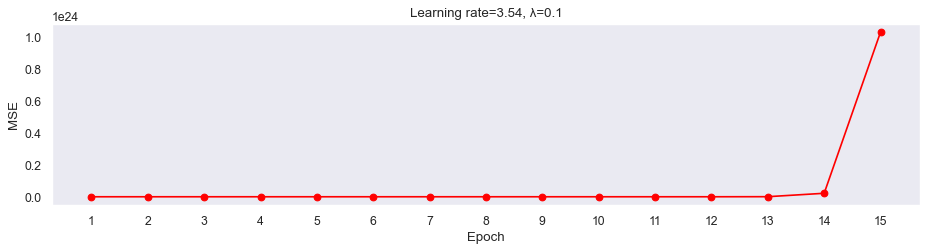

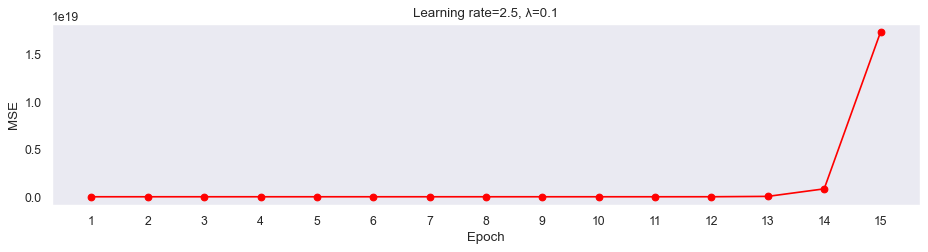

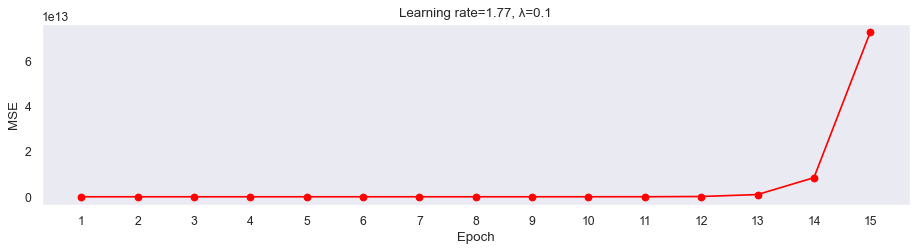

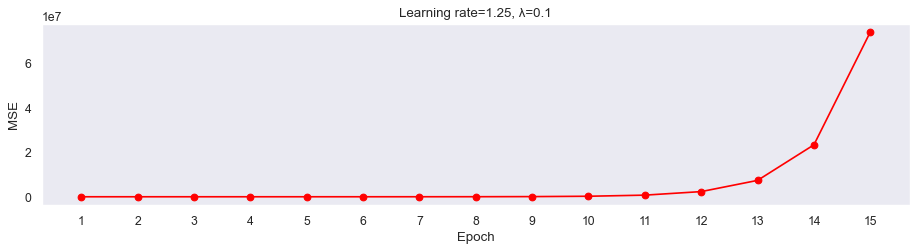

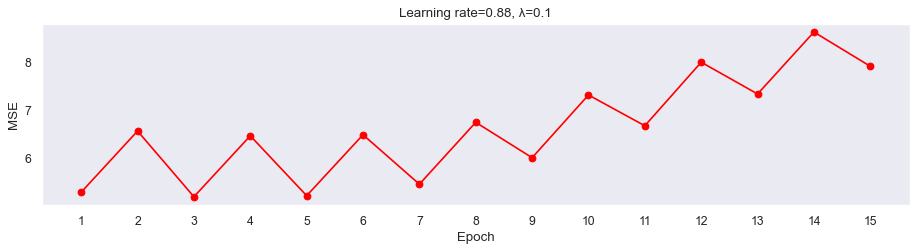

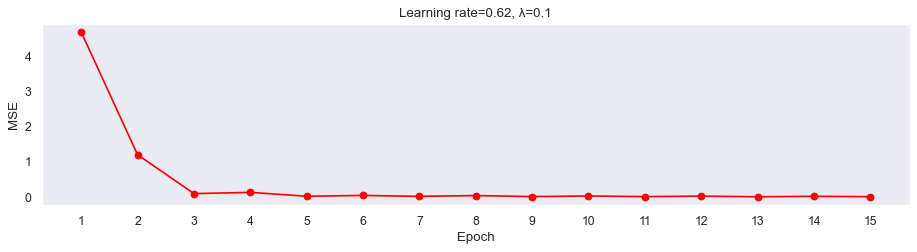

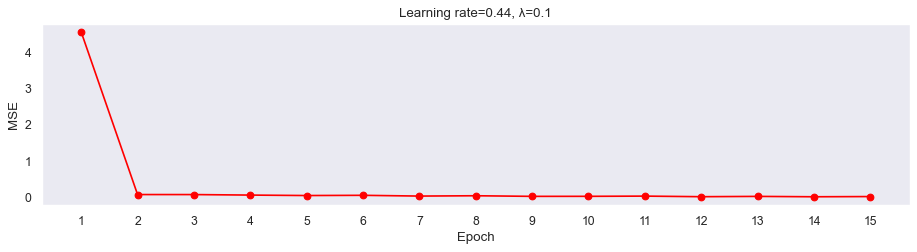

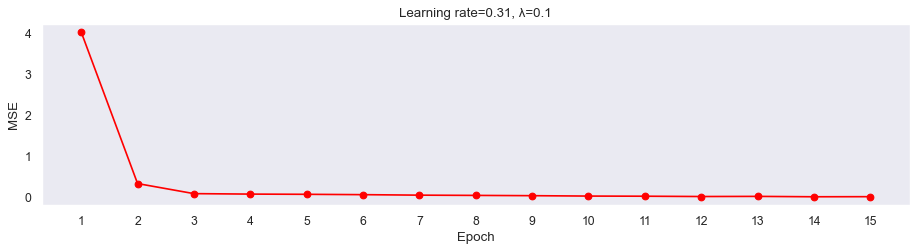

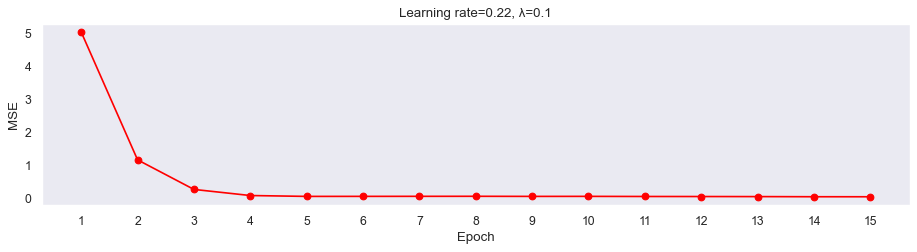

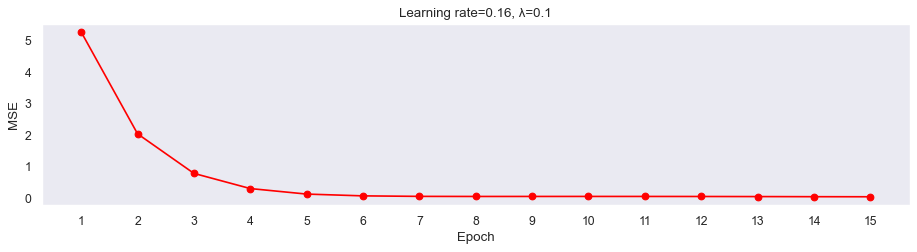

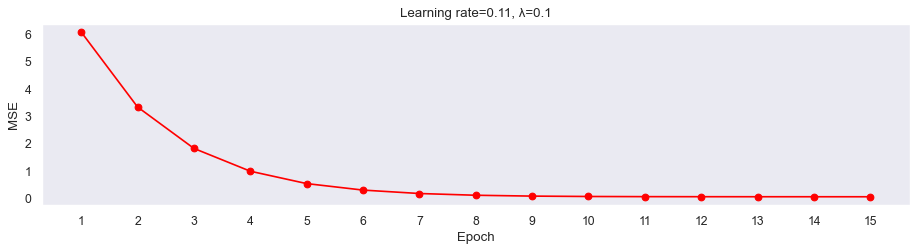

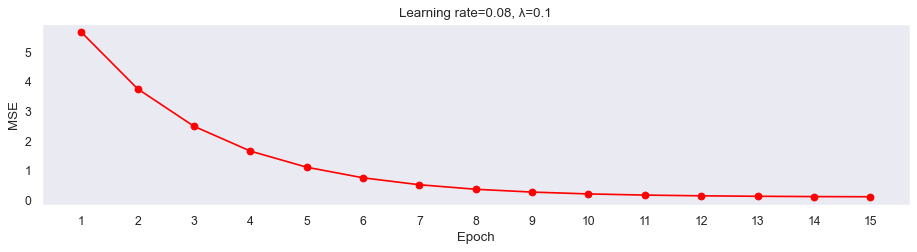

In [2688]:
learning_rate = 5
for i in range(12):
    learning_rate = round(learning_rate / np.sqrt(2), 2)
    ridgeRegression(lambd=0.1, n_features = 10, learn_rate = learning_rate, show=True)

###### Optymalnie dla learning rate = 0.5

## Zadanie 8
Dla 5 wybranych w Zadaniu 5 cech dokonaj doboru współczynnika regularyzacji dla metody grzbietowej. 

*Skorzystaj z własnej implementacji regresji z Zadania 7. Zacznij od wysokiego współczynnika uczenia.*

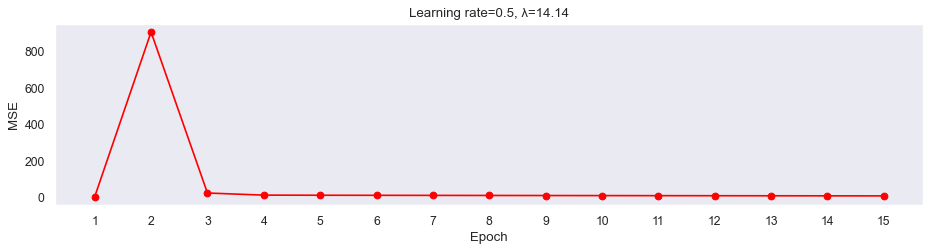

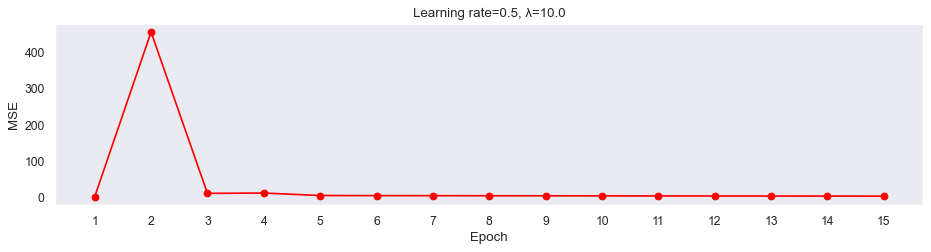

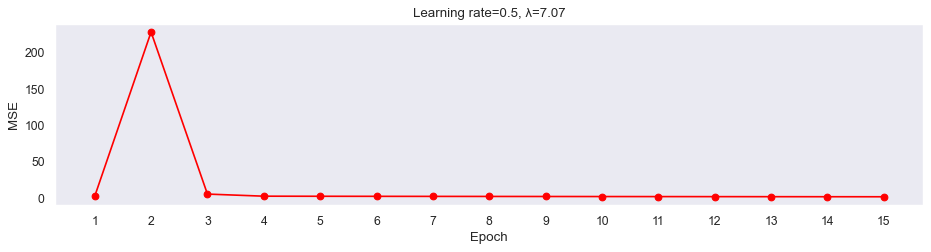

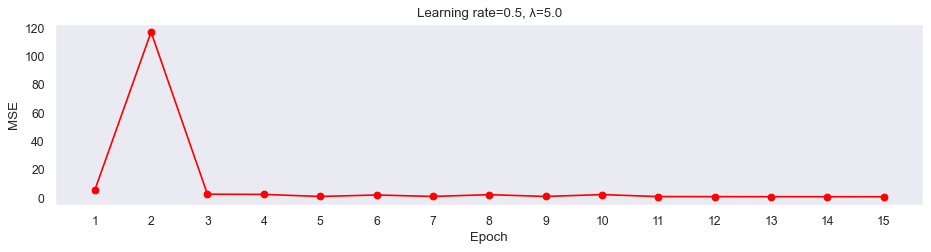

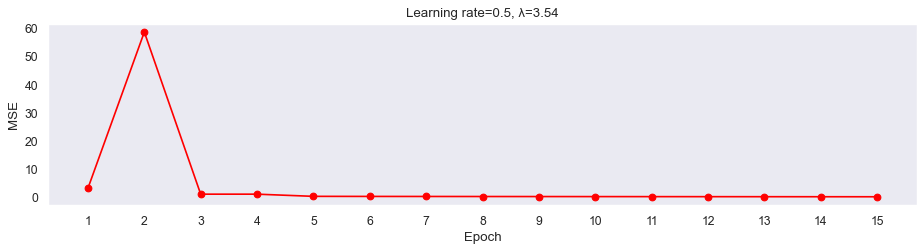

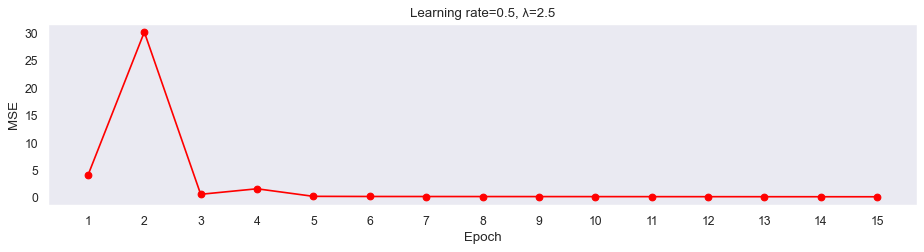

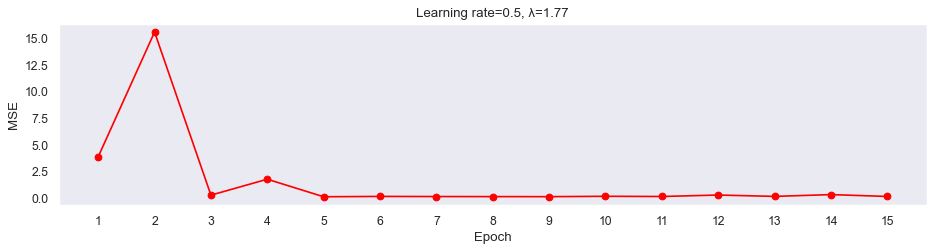

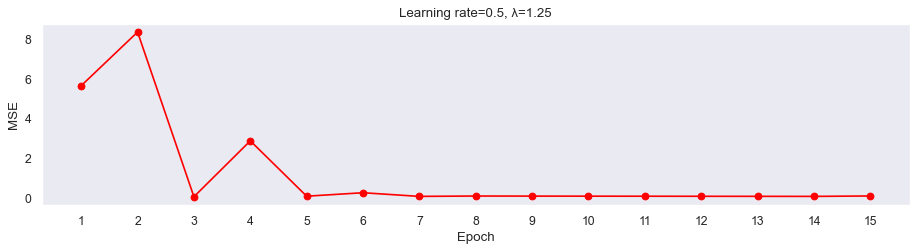

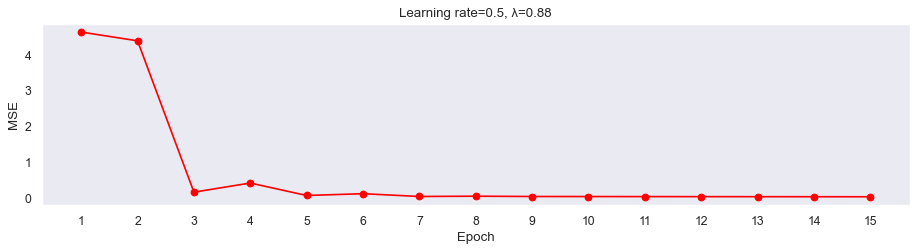

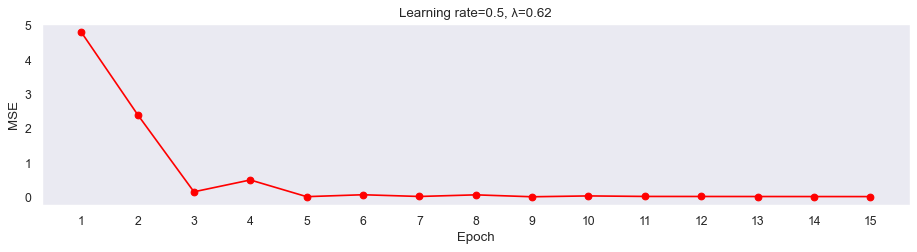

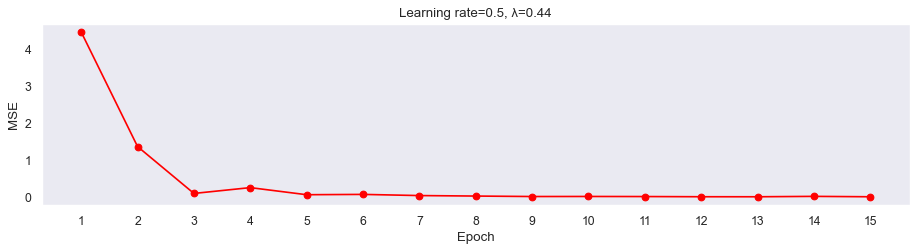

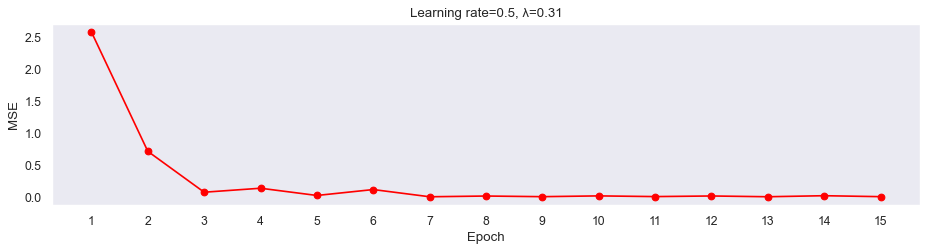

In [2689]:
learning_rate = 0.5
lambd = 20
for i in range(12):
    lambd = round(lambd / np.sqrt(2), 2)
    ridgeRegression(lambd, n_features = 10, learn_rate = learning_rate, show=True)

##### Optymalna wartość współczynnika regularyzacji: 0.31

## Zadanie 9
Wytrenuj 5 modeli:
1. Wykorzystujący wszystkie cechy dane w zbiorze.
2. Wykorzystujący wszystkie cechy dane w zbiorze + 5 zaproponowanych.
3. Wykorzystujący 5 cech wybranych regresją krokową w tył.
4. Wykorzystujące tylko cechy wybrane dzięki metodzie Lasso.
5. Wykorzystujące cechy wybrane w metodzie Lasso i poddane regularyzacji grzbietowej dla wybranego współczynnika regularyzacji.

In [2690]:
def plot(num, title ):
    plt.subplots(figsize=(10, 5), dpi=80)
    ticks = range(1, len(num)+1)
    plt.plot( ticks, num, marker='o', color = "green" )
    plt.xticks(ticks=ticks); plt.title(title);
    plt.grid(alpha=0.4); plt.xlabel('Epoch'); plt.ylabel('MSE');

In [2691]:
norm = lambda data: (data - data.min()) / (data.max() - data.min())

def input_data(X, y):
    row = norm(X).shape[0]
    col = norm(X).shape[1]
    featr = list(norm(X).columns.values)
    X_tr = norm(X)
    Y_tr = norm(y)
    
    return row, col, featr, X_tr, Y_tr

row, col, featr, domy_tr, ceny_tr = input_data(domy_train, ceny_train)

In [2692]:
def train( method, lambd, show=True, return_model=False):
    costs = []
    bias = 0.0
    theta = np.random.rand(X.shape[1])
    N = len(theta)
    for e in range(epochs):        


        yhat = np.array(X.dot(theta) + bias)
        diff = (Y - yhat)

        train_cost = np.sum(diff**2) / (2*size)
        if method == 'LASSO':
            reg_cost = np.sum(np.abs(theta)) * lambd / (2*size)
        elif method == 'Ridge':
            reg_cost = np.sum(theta**2) * lambd / (2*size)
        costs += [train_cost + reg_cost]

        new_theta = np.zeros(N)
        for j in range(N):
            
            dW = diff.dot(X[:, j]) / (-2*M)
            
            if method == 'LASSO':
                dW = (dW + lambd) if (theta[j] > 0) else (dW - lambd)
            elif method == 'Ridge':
                dW = dW + lambd * theta[j]
            
            new_theta[j] = theta[j] - LR * dW
        
        theta = new_theta
        db = np.sum(diff) / (-2*M)
        bias = bias - LR * db

   
    if show:
        plot( costs, f'{method}: {N} features, Learning rate={LR}, λ={lambd}' )
    if return_model:
        d = { f:w for f, w in zip(features, theta) }
        d['bias'] = bias
        return d

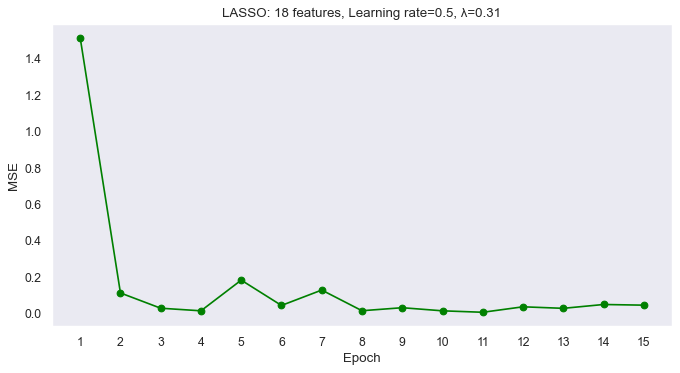

In [2693]:
# 1) Model all originial features
epochs = 15
LR = 0.5
lambd = 0.31

Y = np.array(ceny_tr)
#Wszystkie pierwotne cechy (nie uwzględniając usuniętych)
features = cechy[:-5]

X = np.array(x_tr.loc[:, features])
size = len(X)
model_all_feat = train( method='LASSO', lambd=lambd, return_model=True )

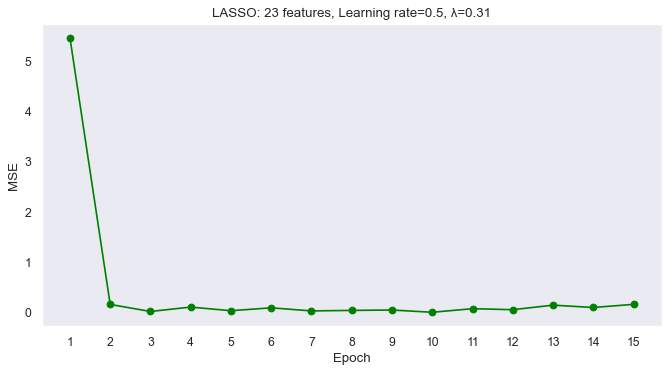

In [2694]:
#2) Model all original features + 5 created

epochs = 15
LR = 0.5
lambd = 0.31

Y = np.array(ceny_tr)

#Wszystkie pierwotne cechy + 5 zaproponowanych
features = cechy

X = np.array(x_tr.loc[:, features])
size = len(X)
model_all_plus_5 = train( method='LASSO', lambd=lambd, return_model=True )

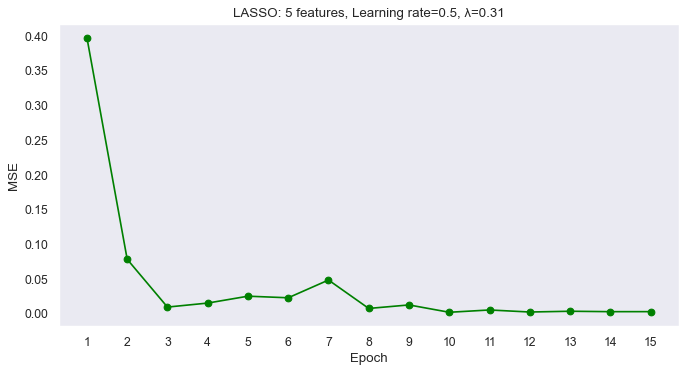

In [2695]:
#3) Model backward stepwise regression (5 gained features)

epochs = 15
LR = 0.5
lambd = 0.31

Y = np.array(ceny_tr)

#Cechy uzyskane za pomocą regresji krokowej w tył
features = cechy_regr

X = np.array(x_tr.loc[:, features])
size = len(X)
model_backward_feat = train( method='LASSO', lambd=lambd, return_model=True )

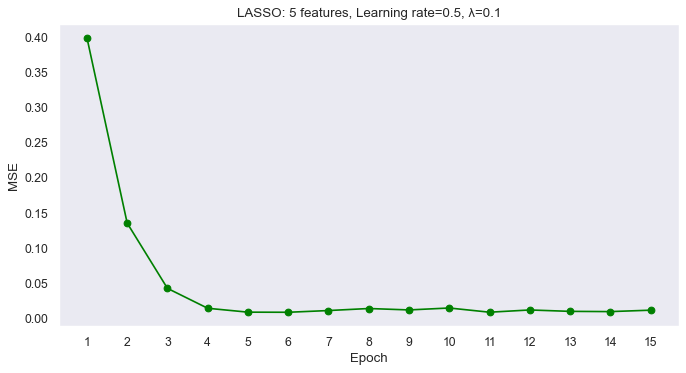

In [2696]:
#4) Model Lasso features

epochs = 15
LR = 0.5
# Dla pierwotnej wartości lambda wynik wychodził niesatysfakjocnujący, dłuższa była znacznie liczba epok potrzebnych na nauczenie
# zmniejszenie do wartości lambda = 0.1 dało dobry efekt
lambd = 0.1
Y = np.array(ceny_tr)

#Cechy uzyskane za pomocą metody Lasso
features = result_lasso

X = np.array(x_tr.loc[:, features])
size = len(X)
model_lasso_feat = train( method='LASSO', lambd=lambd, return_model=True )

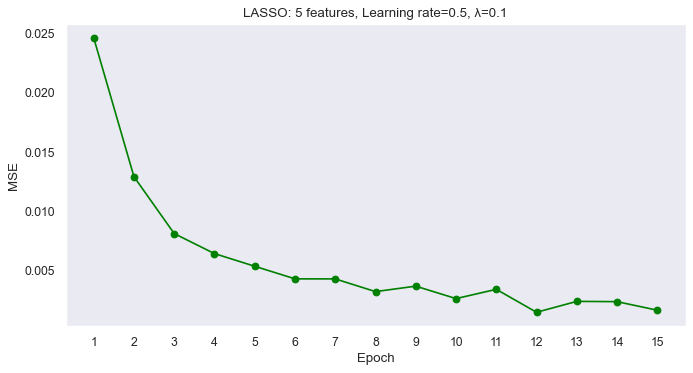

In [2697]:
#5) Model Lasso features + ridge regresion

epochs = 15
LR = 0.5
# Dla pierwotnej wartości lambda wynik wychodził niesatysfakjocnujący, dłuższa była znacznie liczba epok potrzebnych na nauczenie
# zmniejszenie do wartości lambda = 0.1 dało dobry efekt
lambd = 0.1
Y = np.array(ceny_tr)

#Cechy uzyskane za pomocą metody Lasso poddane regularyzacjig grzbietowej
features = result_ridge

X = np.array(x_tr.loc[:, features])
size = len(X)
model_ridge_feat = train( method='LASSO', lambd=lambd, return_model=True )

## Zadanie 10
Dokonaj oceny i porównania modeli z Zadania 9. Wybierz najlepszy model.

Najlepszym modelem okazał się model4, który bazował na cechach uzyskanych za pomocą metody Lasso (mała liczba danych trenujących (cech) - najkrótszy czas uczenia, najmniejszy błąd MSE. Niewiele gorszym okazał się model3 (bazujący na cechach uzyskanych dzięki regresji krokowej w tył), w którym jednak czas uczenia był dłuższy niż w poprzednim, może to wynikać z niepoprawnego ustalenia parametrów uczenia.
Najsłabiej zgodnie z oczekiwaniami wypadły modele 1 i 2, które posiadały największą liczbę danych (cech) treningowych.
Model5 potrzebował dużą liczbę epok do nauczenia, tutaj ponownie być problem wynikający ze złego dobraniach parametrów uczenia.